In [540]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

# Before Steroid Era Section

In [541]:
# Create a hitting dataframe
hitting_df_cleaned = pd.read_csv('hitting_df_cleaned.csv')

In [542]:
hitting_df_cleaned.head()

,yearID,AB,H,HR,BA,SLG,OPS,HR_prior,HR_increase,BA_increase,SLG_increase,OPS_increase
0,1994,345,86,9,0.249,0.394,0.687,0.0,0.000,0.000,0.000,0.000
1,1995,420,107,17,0.255,0.452,0.773,9.0,88.889,2.201,14.758,12.653
2,1996,320,81,8,0.253,0.428,0.735,17.0,-52.941,-0.643,-5.362,-4.920
3,1997,252,69,6,0.274,0.433,0.747,8.0,-25.000,8.172,1.031,1.601
4,2006,255,54,5,0.212,0.333,0.605,0.0,0.000,0.000,0.000,0.000


In [543]:
# Filter the years from 1984 to 1993
before_df =hitting_df_cleaned[(hitting_df_cleaned['yearID'] >= 1984) & (hitting_df_cleaned['yearID'] <= 1993)]

In [544]:
before_df.round(3).describe()

,yearID,AB,H,HR,BA,SLG,OPS,HR_prior,HR_increase,BA_increase,SLG_increase,OPS_increase
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000
mean,1988.632666,463.055069,125.953692,14.016270,0.269305,0.422767,0.762236,10.248436,10.830014,0.426260,0.590202,0.526835
std,2.875345,114.711053,38.062192,9.055578,0.028785,0.062527,0.089220,10.329280,63.083314,9.796281,12.279947,9.807567
min,1984.000000,223.000000,46.000000,3.000000,0.177000,0.262000,0.527000,0.000000,-79.167000,-31.776000,-35.393000,-32.153000
25%,1986.000000,375.000000,96.000000,7.000000,0.250000,0.377000,0.698000,0.000000,-17.391000,-4.056750,-5.192750,-3.964500
50%,1989.000000,477.000000,126.000000,12.000000,0.268000,0.417000,0.754000,8.000000,0.000000,0.000000,0.000000,0.000000
75%,1991.000000,559.000000,155.000000,19.000000,0.287000,0.462750,0.819000,17.000000,16.667000,3.458500,4.773000,4.480500
max,1993.000000,701.000000,240.000000,51.000000,0.370000,0.677000,1.140000,49.000000,675.000000,71.040000,61.119000,56.802000


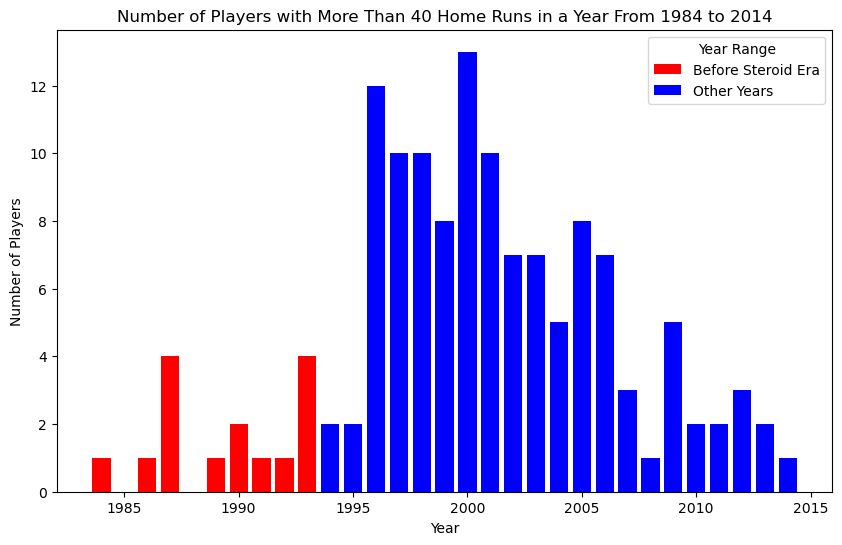

In [545]:
import matplotlib.pyplot as plt

# Filter for players who hit more than 40 home runs
home_run_threshold = 40
before_df_over_40 = hitting_df_cleaned[hitting_df_cleaned['HR'] >= home_run_threshold]

# Count the number of players per year
players_per_year = before_df_over_40['yearID'].value_counts().sort_index()

# Define the years to highlight
highlight_years = range(1984, 1994)

# Create a list of colors for each year
colors = ['red' if year in highlight_years else 'blue' for year in players_per_year.index]

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(players_per_year.index, players_per_year.values, color=colors)
plt.xlabel('Year')
plt.ylabel('Number of Players')
plt.title('Number of Players with More Than 40 Home Runs in a Year From 1984 to 2014')

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', label='Before Steroid Era'),
                   Patch(facecolor='blue', label='Other Years')]

# Add legend to plot
plt.legend(handles=legend_elements, title='Year Range')

# Show plot
plt.show()


This histogram shows the number of players who it over 40 home runs in a single year with the pre-steroid era section of the graph highlighted.

In [546]:
#display before steroid era dataframe summary statistics
before_df.describe().round(3)

,yearID,AB,H,HR,BA,SLG,OPS,HR_prior,HR_increase,BA_increase,SLG_increase,OPS_increase
count,1598.000,1598.000,1598.000,1598.000,1598.000,1598.000,1598.000,1598.000,1598.000,1598.000,1598.000,1598.000
mean,1988.633,463.055,125.954,14.016,0.269,0.423,0.762,10.248,10.830,0.426,0.590,0.527
std,2.875,114.711,38.062,9.056,0.029,0.063,0.089,10.329,63.083,9.796,12.280,9.808
min,1984.000,223.000,46.000,3.000,0.177,0.262,0.527,0.000,-79.167,-31.776,-35.393,-32.153
25%,1986.000,375.000,96.000,7.000,0.250,0.377,0.698,0.000,-17.391,-4.057,-5.193,-3.964
50%,1989.000,477.000,126.000,12.000,0.268,0.417,0.754,8.000,0.000,0.000,0.000,0.000
75%,1991.000,559.000,155.000,19.000,0.287,0.463,0.819,17.000,16.667,3.458,4.773,4.480
max,1993.000,701.000,240.000,51.000,0.370,0.677,1.140,49.000,675.000,71.040,61.119,56.802


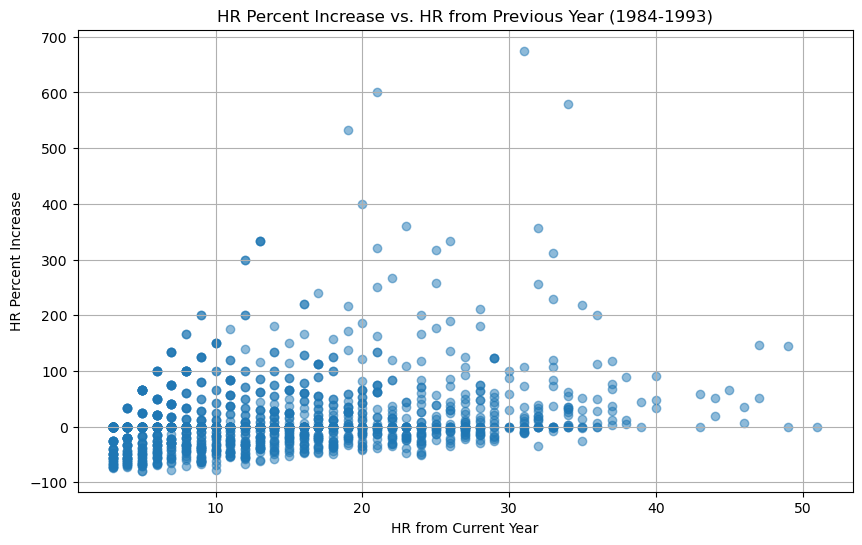

In [547]:
plt.figure(figsize=(10, 6))
plt.scatter(before_df['HR'], before_df['HR_increase'], alpha=0.5)
plt.title('HR Percent Increase vs. HR from Previous Year (1984-1993)')
plt.xlabel('HR from Current Year')
plt.ylabel('HR Percent Increase')
plt.grid(True)
plt.show()

This scatterplot shows the number of home runs in a given year, and the percentage higher the count was from the previous year. A higher percentage increase means that that player had a significant jump in performance over the course of just one year.

### HR vs. SLG

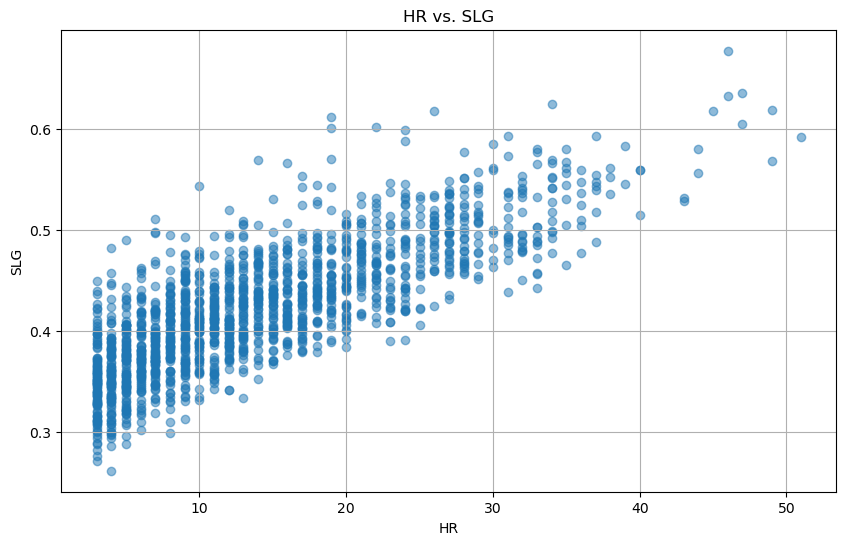

In [548]:
plt.figure(figsize=(10, 6))
plt.scatter(before_df['HR'], before_df['SLG'], alpha=0.5)
plt.title('HR vs. SLG')
plt.xlabel('HR')
plt.ylabel('SLG')
plt.grid(True)
plt.show()

It makes sense that as the number of home runs increases, the slugging percentage also increase, since slugging percentage takes into account extra base hits, including home runs, this is a great indication of a hitters power.

### SLG vs. OPS

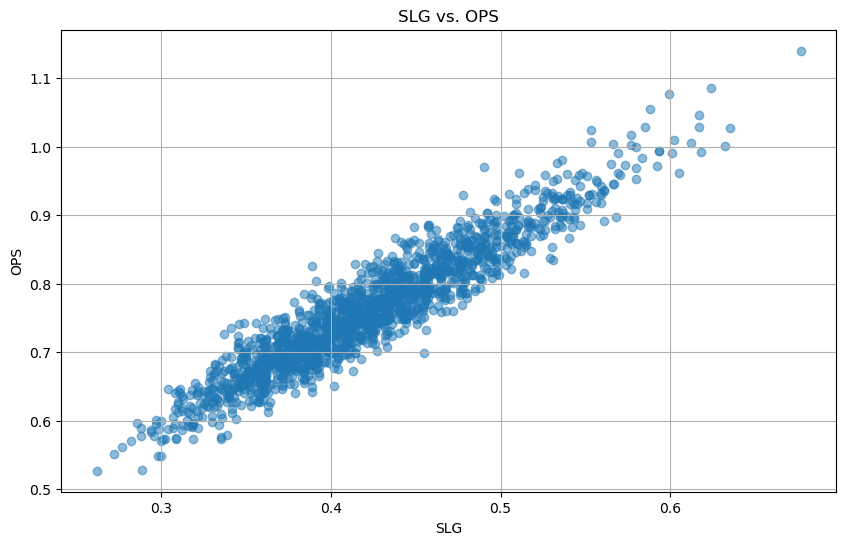

In [549]:
plt.figure(figsize=(10, 6))
plt.scatter(before_df['SLG'], before_df['OPS'], alpha=0.5)
plt.title('SLG vs. OPS')
plt.xlabel('SLG')
plt.ylabel('OPS')
plt.grid(True)
plt.show()

This scatterplot shows the slugging percentage vs the On-base plus Slugging percentage, as the SLG increases, the OPS also increases because the better hitter they are, the more they will get one base.

### OPS_increase vs. SLG_increase

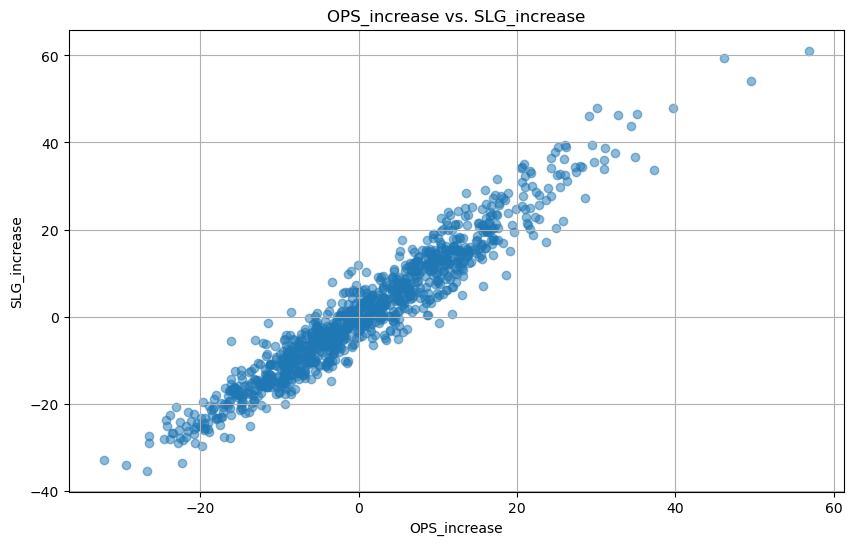

In [550]:
plt.figure(figsize=(10, 6))
plt.scatter(before_df['OPS_increase'], before_df['SLG_increase'], alpha=0.5)
plt.title('OPS_increase vs. SLG_increase')
plt.xlabel('OPS_increase')
plt.ylabel('SLG_increase')
plt.grid(True)
plt.show()

As the OPS_increase gets larger, the SLG_increase also grows larger because SLG is one of the variables that makes up OPS, so as one increases, so does the other.

### OPS_increase vs. BA_increase

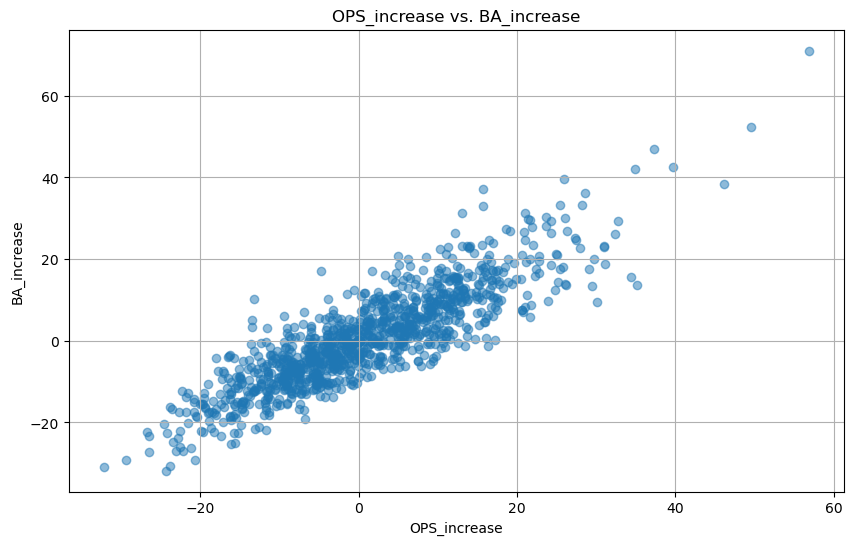

In [551]:
plt.figure(figsize=(10, 6))
plt.scatter(before_df['OPS_increase'], before_df['BA_increase'], alpha=0.5)
plt.title('OPS_increase vs. BA_increase')
plt.xlabel('OPS_increase')
plt.ylabel('BA_increase')
plt.grid(True)
plt.show()

As the OPS_increase grows larger, so does the BA_increase because a higher batting average means they are getting more hits, thus increasing the OPS.

### KMeans Section

In [552]:
#scale the features, using Standard Scaler
scaler = StandardScaler()
before_df = scaler.fit_transform(before_df)

In [553]:
# Initialize a list to store the values of inertia (within-cluster sum of squares)
inertia = []

In [554]:
# Iterate over a range of values for K (number of clusters)
for k in range(1, 11):
    # Create a KMeans instance with K clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    # Fit the model to the data
    kmeans.fit(before_df)
    # Append the inertia to the list
    inertia.append(kmeans.inertia_)

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Window

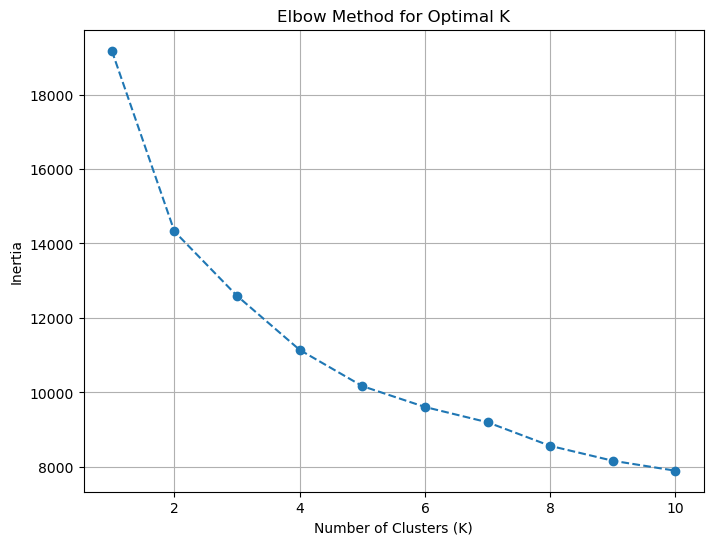

In [555]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

### KMeans for HR vs. HR Percent Increase

In [556]:
# Perform k-means clustering with K=3
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(before_df)
labels = kmeans.labels_

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [557]:
# Define custom colors for each class
custom_colors = ['teal', 'purple', 'blue', 'red', 'orange']

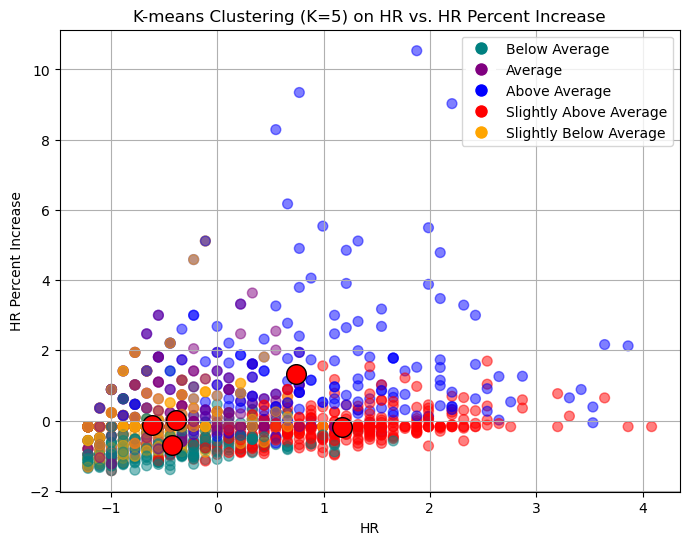

In [558]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot the points with color based on the cluster labels
plt.scatter(before_df[:, 3], before_df[:, 8], c=labels, cmap=ListedColormap(custom_colors), s=50, alpha=0.5)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 3], centroids[:, 8], marker='o', c='red', s=200, edgecolors='k')

# Add legend specifying the class of wine for each cluster
legend_labels = ['Below Average', 'Average', 'Above Average', 'Slightly Above Average', 'Slightly Below Average']  # Custom labels for each class
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(custom_colors, legend_labels)]

# Add the legend to the plot
plt.legend(handles=legend_handles)

plt.xlabel('HR')
plt.ylabel('HR Percent Increase')
plt.title('K-means Clustering (K=5) on HR vs. HR Percent Increase')
plt.grid(True)
plt.show()

In [559]:
# Count the number of players in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of players in each cluster:", cluster_counts)

# Assuming label 2 corresponds to "Above Average"
above_average_count = cluster_counts[2]
print("Number of 'Above Average' players:", above_average_count)

Number of players in each cluster: {0: 229, 1: 369, 2: 210, 3: 319, 4: 471}
Number of 'Above Average' players: 210


In [560]:
total_players = len(labels)
percentage_above_average = (above_average_count / total_players) * 100
print(f"Percentage of 'Above Average' players: {percentage_above_average:.2f}%")

Percentage of 'Above Average' players: 13.14%


### KMeans for HR vs. SLG

In [561]:
# Perform k-means clustering with K=3
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(before_df)
labels = kmeans.labels_

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [562]:
# Define custom colors for each class
custom_colors = ['teal', 'purple', 'blue', 'red', 'orange']

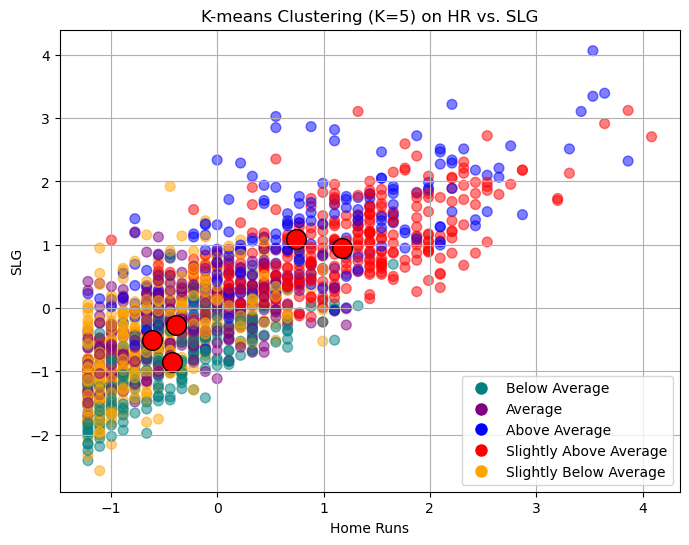

In [563]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot the points with color based on the cluster labels
plt.scatter(before_df[:, 3], before_df[:, 5], c=labels, cmap=ListedColormap(custom_colors), s=50, alpha=0.5)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 3], centroids[:, 5], marker='o', c='red', s=200, edgecolors='k')

# Add legend specifying the class of wine for each cluster
legend_labels = ['Below Average', 'Average', 'Above Average', 'Slightly Above Average', 'Slightly Below Average']  # Custom labels for each class
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(custom_colors, legend_labels)]

# Add the legend to the plot
plt.legend(handles=legend_handles)

plt.xlabel('Home Runs')
plt.ylabel('SLG')
plt.title('K-means Clustering (K=5) on HR vs. SLG')
plt.grid(True)
plt.show()

In [564]:
# Count the number of players in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of players in each cluster:", cluster_counts)

# Assuming label 2 corresponds to "Above Average"
above_average_count = cluster_counts[2]
print("Number of 'Above Average' players:", above_average_count)

Number of players in each cluster: {0: 229, 1: 369, 2: 210, 3: 319, 4: 471}
Number of 'Above Average' players: 210


In [565]:
total_players = len(labels)
percentage_above_average = (above_average_count / total_players) * 100
print(f"Percentage of 'Above Average' players: {percentage_above_average:.2f}%")

Percentage of 'Above Average' players: 13.14%


### KMeans for SLG vs. OPS

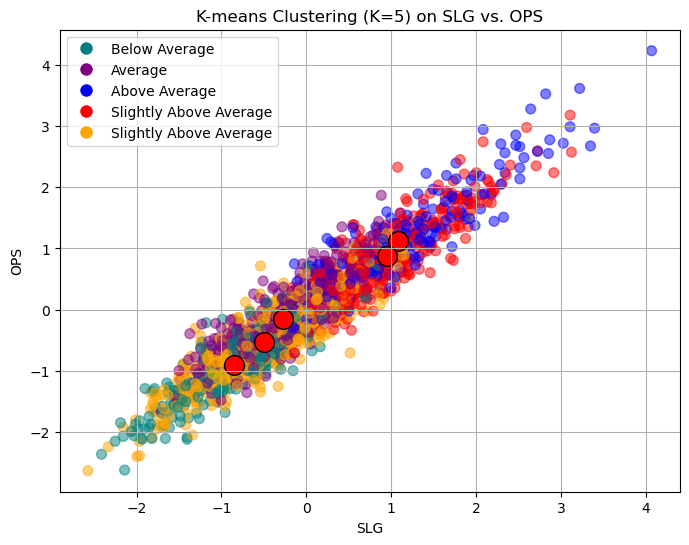

In [566]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot the points with color based on the cluster labels
plt.scatter(before_df[:, 5], before_df[:, 6], c=labels, cmap=ListedColormap(custom_colors), s=50, alpha=0.5)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 5], centroids[:, 6], marker='o', c='red', s=200, edgecolors='k')

# Add legend specifying the class of wine for each cluster
legend_labels = ['Below Average', 'Average', 'Above Average', 'Slightly Above Average', 'Slightly Above Average']  # Custom labels for each class
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(custom_colors, legend_labels)]

# Add the legend to the plot
plt.legend(handles=legend_handles)

plt.xlabel('SLG')
plt.ylabel('OPS')
plt.title('K-means Clustering (K=5) on SLG vs. OPS')
plt.grid(True)
plt.show()

In [567]:
# Count the number of players in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of players in each cluster:", cluster_counts)

# Assuming label 2 corresponds to "Above Average"
above_average_count = cluster_counts[2]
print("Number of 'Above Average' players:", above_average_count)

Number of players in each cluster: {0: 229, 1: 369, 2: 210, 3: 319, 4: 471}
Number of 'Above Average' players: 210


In [568]:
total_players = len(labels)
percentage_above_average = (above_average_count / total_players) * 100
print(f"Percentage of 'Above Average' players: {percentage_above_average:.2f}%")

Percentage of 'Above Average' players: 13.14%


### KMeans for OPS Increase vs. SLG Increase

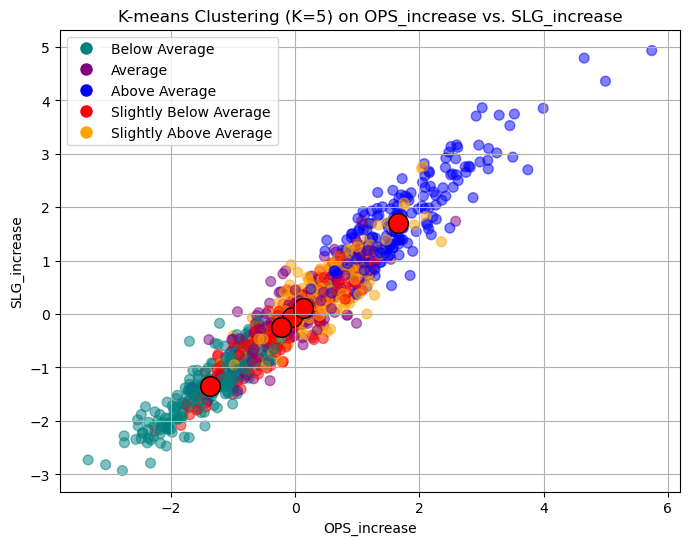

In [569]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot the points with color based on the cluster labels
plt.scatter(before_df[:, 11], before_df[:, 10], c=labels, cmap=ListedColormap(custom_colors), s=50, alpha=0.5)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 11], centroids[:, 10], marker='o', c='red', s=200, edgecolors='k')

# Add legend specifying the class of wine for each cluster
legend_labels = ['Below Average', 'Average', 'Above Average', 'Slightly Below Average', 'Slightly Above Average']  # Custom labels for each class
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(custom_colors, legend_labels)]

# Add the legend to the plot
plt.legend(handles=legend_handles)

plt.xlabel('OPS_increase')
plt.ylabel('SLG_increase')
plt.title('K-means Clustering (K=5) on OPS_increase vs. SLG_increase')
plt.grid(True)
plt.show()

In [570]:
# Count the number of players in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of players in each cluster:", cluster_counts)

# Assuming label 2 corresponds to "Above Average"
above_average_count = cluster_counts[2]
print("Number of 'Above Average' players:", above_average_count)

Number of players in each cluster: {0: 229, 1: 369, 2: 210, 3: 319, 4: 471}
Number of 'Above Average' players: 210


In [571]:
total_players = len(labels)
percentage_above_average = (above_average_count / total_players) * 100
print(f"Percentage of 'Above Average' players: {percentage_above_average:.2f}%")

Percentage of 'Above Average' players: 13.14%


### KMeans for OPS_increase vs. BA_increase

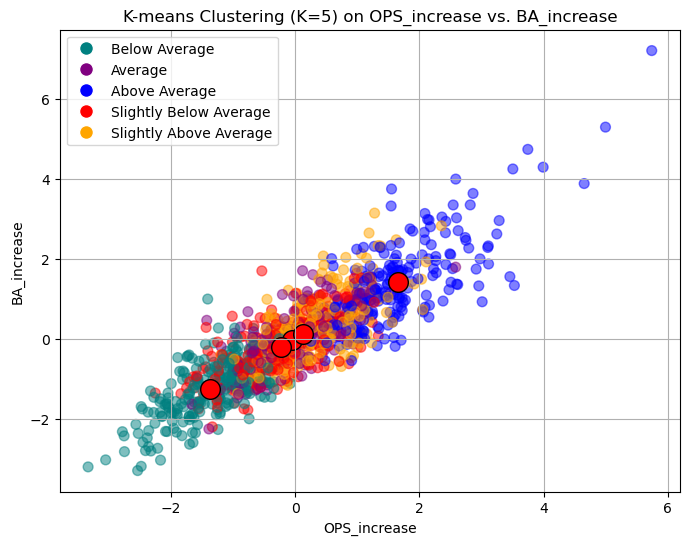

In [572]:
# Visualize the clusters
plt.figure(figsize=(8, 6))

# Plot the points with color based on the cluster labels
plt.scatter(before_df[:, 11], before_df[:, 9], c=labels, cmap=ListedColormap(custom_colors), s=50, alpha=0.5)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 11], centroids[:, 9], marker='o', c='red', s=200, edgecolors='k')

# Add legend specifying the class of wine for each cluster
legend_labels = ['Below Average', 'Average', 'Above Average', 'Slightly Below Average', 'Slightly Above Average']  # Custom labels for each class
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(custom_colors, legend_labels)]

# Add the legend to the plot
plt.legend(handles=legend_handles)

plt.xlabel('OPS_increase')
plt.ylabel('BA_increase')
plt.title('K-means Clustering (K=5) on OPS_increase vs. BA_increase')
plt.grid(True)
plt.show()

In [573]:
# Count the number of players in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of players in each cluster:", cluster_counts)

# Assuming label 2 corresponds to "Above Average"
above_average_count = cluster_counts[2]
print("Number of 'Above Average' players:", above_average_count)

Number of players in each cluster: {0: 229, 1: 369, 2: 210, 3: 319, 4: 471}
Number of 'Above Average' players: 210


In [574]:
total_players = len(labels)
percentage_above_average = (above_average_count / total_players) * 100
print(f"Percentage of 'Above Average' players: {percentage_above_average:.2f}%")

Percentage of 'Above Average' players: 13.14%


### KMeans after Applying PCA

In [575]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(before_df)
principal_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

In [576]:
# Perform k-means clustering with K=3
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(before_df)
labels = kmeans.labels_

C:\Users\kevin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [577]:
# Define custom colors for each class
custom_colors = ['teal', 'purple', 'blue', 'red', 'orange']

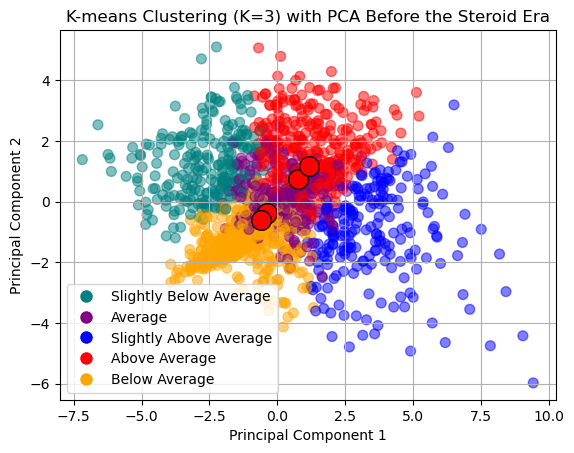

In [578]:
# Plot the points with color based on the cluster labels
plt.scatter(principal_df['Principal Component 1'], principal_df['Principal Component 2'], c=labels, cmap=ListedColormap(custom_colors), s=50, alpha=0.5)

# Plot the centroids of the clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 3], centroids[:, 3], marker='o', c='red', s=200, edgecolors='k')

# Add legend specifying the class of wine for each cluster
legend_labels = ['Slightly Below Average', 'Average', 'Slightly Above Average', 'Above Average', 'Below Average']  # Custom labels for each class
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(custom_colors, legend_labels)]
plt.legend(handles=legend_handles)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering (K=3) with PCA Before the Steroid Era')
plt.grid(True)
plt.show()

In [579]:
# Count the number of players in each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = dict(zip(unique, counts))
print("Number of players in each cluster:", cluster_counts)

# Assuming label 2 corresponds to "Above Average"
above_average_count = cluster_counts[3]
print("Number of 'Above Average' players:", above_average_count)

Number of players in each cluster: {0: 229, 1: 369, 2: 210, 3: 319, 4: 471}
Number of 'Above Average' players: 319


In [580]:
total_players = len(labels)
percentage_above_average = (above_average_count / total_players) * 100
print(f"Total Players: {total_players:.2f}")
print(f"Percentage of 'Above Average' players: {percentage_above_average:.2f}%")

Total Players: 1598.00
Percentage of 'Above Average' players: 19.96%
